# CÂU 5: Địa điểm, quốc gia nào có nhiều biến động về khí hậu lớn nhất trong 12 tháng của năm 2022, có thể chỉ ra tháng nào hay không ? 

In [170]:
# Gọi các thư viện cần thiết.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


Đọc file csv `../airdata6years.csv` và lưu vào biến `df`

In [171]:
df = pd.read_csv('../airdata6years.csv', index_col = 'Unnamed: 0')
df = df.drop(df.columns[[3, 16, 17, 18, 19]], axis = 1)
df.head() 

,Rank,City,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Bhiwadi,India,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6
1,2,Ghaziabad,India,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0
2,3,Hotan,China,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6
3,4,Delhi,India,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4
4,5,Jaunpur,India,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7


### Tính max, min của từng dòng và lưu vào `max_df`, `min_df`. 
Ở dòng này sẽ có cảnh báo lỗi 1 xíu do dữ liệu có các giá trị NaN nên khi tính mix, max thì sẽ cảnh báo lỗi. Hmmm, có thể chúng ta sẽ bỏ qua lỗi này vì chính xác thì ta không thể thay NaN thành dữ liệu khác được, như thế có thể làm ảnh hưởng đến kết quả của mô hình.

In [172]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    max_df = df.drop(['Rank'], axis = 1).max(axis = 1)
    min_df = df.drop(['Rank'], axis = 1).min(axis = 1)


- Cho rằng, nếu dữ liệu có sự chênh lệch giữa chất lượng không khí min, max giữa các tháng thì có nghĩa là địa điểm ấy có sự biến động về chất lượng không khí.
- Ta quy ước, thấy rằng nếu US AQI < 15 thì nằm ở mức trung bình, và US AQI > 50 là mức độc hại. Nên nếu có địa điểm xuất hiện 2 mức độ này trong năm thì sẽ có khả năng bị biến động ô nhiễm không khí.

In [173]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    air_volatility_df = df[min_df <= 15][max_df > 50]
air_volatility_df.head()

,Rank,City,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
24,25,Meerut,India,143.7,140.9,88.9,66.0,44.5,35.5,24.8,23.1,14.7,70.1,183.4,136.9
39,40,Shchuchinsk,Kazakhstan,2.1,1.8,52.3,83.6,75.1,72.9,68.8,70.6,69.5,78.0,83.1,89.7
50,301,Coyhaique,Chile,6.5,4.5,11.4,27.0,83.2,127.3,41.3,60.2,33.8,17.3,11.2,5.1
55,306,Neijiang,China,72.0,67.3,38.4,25.7,30.5,23.1,15.1,12.8,14.4,21.9,48.4,55.6
60,311,Ili,China,99.9,41.0,25.6,23.5,18.9,13.5,16.1,20.2,26.4,27.9,47.4,62.6


In [174]:
air_volatility_df.shape 

(443, 15)

Ta thấy có 443 địa điểm biến động không khí, tuy nhiên sự biến động này chưa rõ và cũng chưa nói lên được điều gì.

Do đó ta sẽ tiếp tục tìm ở khoảng lớn hơn, khi không khí là ở mức tốt (US AQI < 10) và ở mức vượt ngưỡng (US AQI > 100)


In [175]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    air_volatility_violenty_df = air_volatility_df[max_df > 100][min_df < 10].sort_values(by = 'Rank')
air_volatility_violenty_df.head()

,Rank,City,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
328,84,Lampang,Thailand,113.7,131.7,149.5,101.0,13.3,6.0,6.4,7.9,7.3,13.2,22.7,45.9
269,110,Angol,Chile,7.2,7.0,3.2,NaN,56.2,125.3,89.9,67.8,52.9,22.1,8.8,12.0
307,126,Manikganj,Bangladesh,162.3,110.1,93.8,6.6,3.6,2.3,1.7,2.1,4.1,61.6,89.2,NaN
315,207,Polistena,Italy,16.9,21.4,17.4,9.7,296.6,16.3,10.7,42.0,11.8,9.3,13.2,17.7
378,231,Nan,Thailand,64.6,79.9,116.6,82.1,29.4,8.1,8.6,14.8,9.9,12.8,18.8,32.5


In [176]:
air_volatility_violenty_df.shape

(49, 15)

Đến đây, ta có thể thấy có 43 địa điểm có sự biến động trong không khí một cách rõ ràng hơn. Và từ đây ta có thể tìm ra một vài vấn đề cần thảo luận

## 1. Quốc gia có sự biến động về ô nhiễm không khí rõ nhất trong 12 tháng

Trước khi tìm quốc gia nào có sự biến động lớn về khí hậu, ta trực quan hóa dữ liệu 49 địa điểm trên.

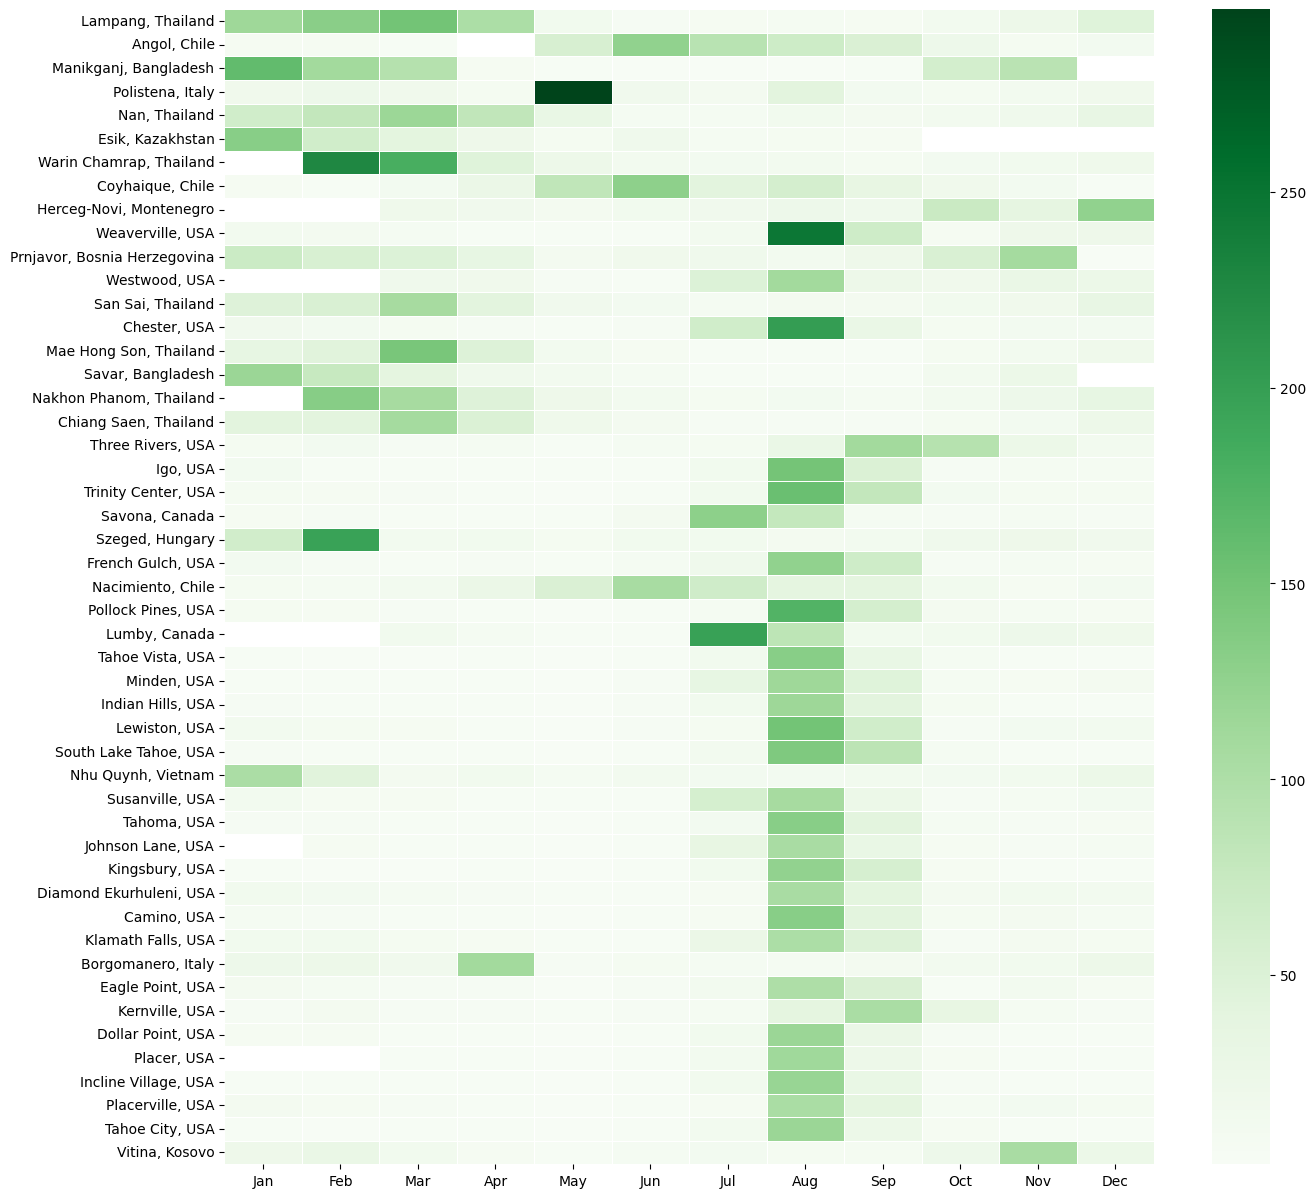

In [177]:
del_col = ['Rank', 'City', 'Country']
Index_df = air_volatility_violenty_df['City'] + ', ' + air_volatility_violenty_df['Country']
visualize_air_volatility = air_volatility_violenty_df.set_index(Index_df)
fig, ax = plt.subplots(1, figsize = (15,15))
sns.heatmap(visualize_air_volatility.drop(del_col, axis = 1), linewidths = 0.5, cmap = "Greens")
plt.show()

**Nhận xét:**
- Ta có thể thấy có một vài quốc gia có sự biến động về ô nhiễm không khí từ nữa đầu năm 2022
- Có 1 quốc gia chỉ biến động về ô nhiễm không khí vào một tháng.

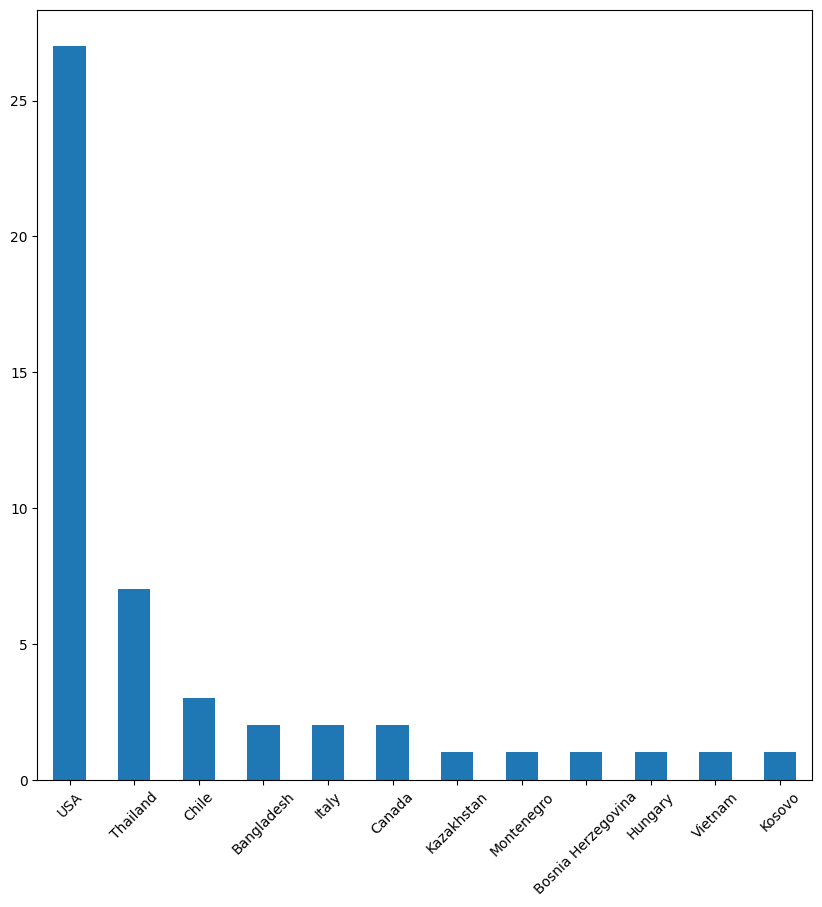

In [178]:
fig, ax = plt.subplots(1, figsize = (10, 10))
air_volatility_violenty_df['Country'].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.show()

**Nhận xét:** 
- Ta có thể thấy một vài địa điểm của USA có biến động lớn về khí hậu. 
- So với toàn bộ cả USA thì các địa điểm này có thể là cùng ở 1 bang của USA.

In [179]:
# Xét ở Hoa Kỳ, tại sao Hoa Kỳ lại bị như thế.
USA_df = air_volatility_violenty_df[air_volatility_violenty_df['Country'] == 'USA'].drop(del_col, axis = 1)
USA_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
79,12.2,9.9,7.9,4.7,3.2,3.5,12.2,246.6,66.3,6.7,20.8,20.5
491,NaN,NaN,18.2,17.5,5.8,5.1,49.8,110.1,23.5,17.3,28.8,23.8
414,16.6,11.3,8.7,6.3,4.8,5.2,64.0,201.4,28.6,9.4,11.0,11.9
520,9.7,12.0,5.3,8.2,5.0,7.5,9.2,28.2,110.8,92.7,24.2,13.1
531,11.2,4.8,4.4,4.4,3.3,4.5,13.5,148.0,51.8,5.8,7.5,7.6


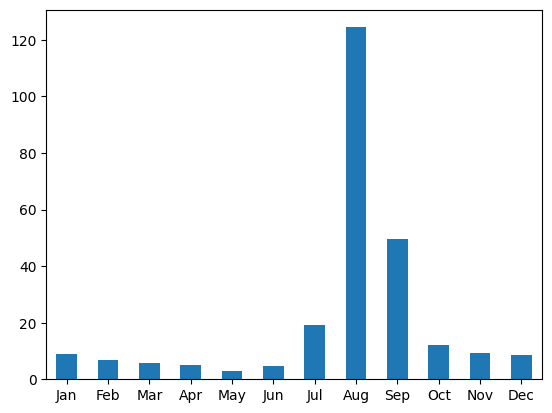

In [180]:
USA_df.mean().plot.bar()
plt.xticks(rotation = 0)
plt.show()

**Giải thích:**
- Do thời tiết tháng 7 8 9 ở USA là thời tiết nóng nên đã ảnh hưởng đến chất lượng không khí của USA tại thời điểm này.
- Ở các địa điểm khác ít bị ảnh hưởng hơn có lẽ một phần là do người dân, chính quyền đã chủ động trong việc phòng chống ô nhiễm không khí vào thời điểm này.